Predicted SoC Values Before Balancing (Percentage):
 [ 30.82544628  54.06581519  23.03023903  30.69223923  69.71806811
  19.53348203  71.1779222   22.68647642  30.2189206   71.93461691
  97.08853603  75.43581554  60.0404185   74.93325222  98.66654181
  93.45415407  64.6434286   49.14861795   9.16117178  88.52858116
   8.66942272  14.69531325   7.98269054  27.73179393  40.95254845
  12.31745484  28.43701126  96.35722786  62.71298292  72.49028427
  20.50919288  86.08675359  68.31160073  91.17827187  73.7774589
  20.09565213  55.0858655   98.61063912  20.07712916  40.64751881
  59.25298728  25.21666889  25.40488767  27.7058664   26.32215433
  87.35071645  87.91244686  13.58846419  73.54160869  64.18761077
  71.32858888 100.          65.74799576  84.8661341   36.10946497
   6.83027418  85.35080905  19.76722638  29.91670994  21.56259141
  94.8223311   38.88835261   3.44784581  82.93615504  11.48155628
  69.58811344  24.1337586   92.91567883  92.93881574  28.22482233
  77.79213724  51.661401

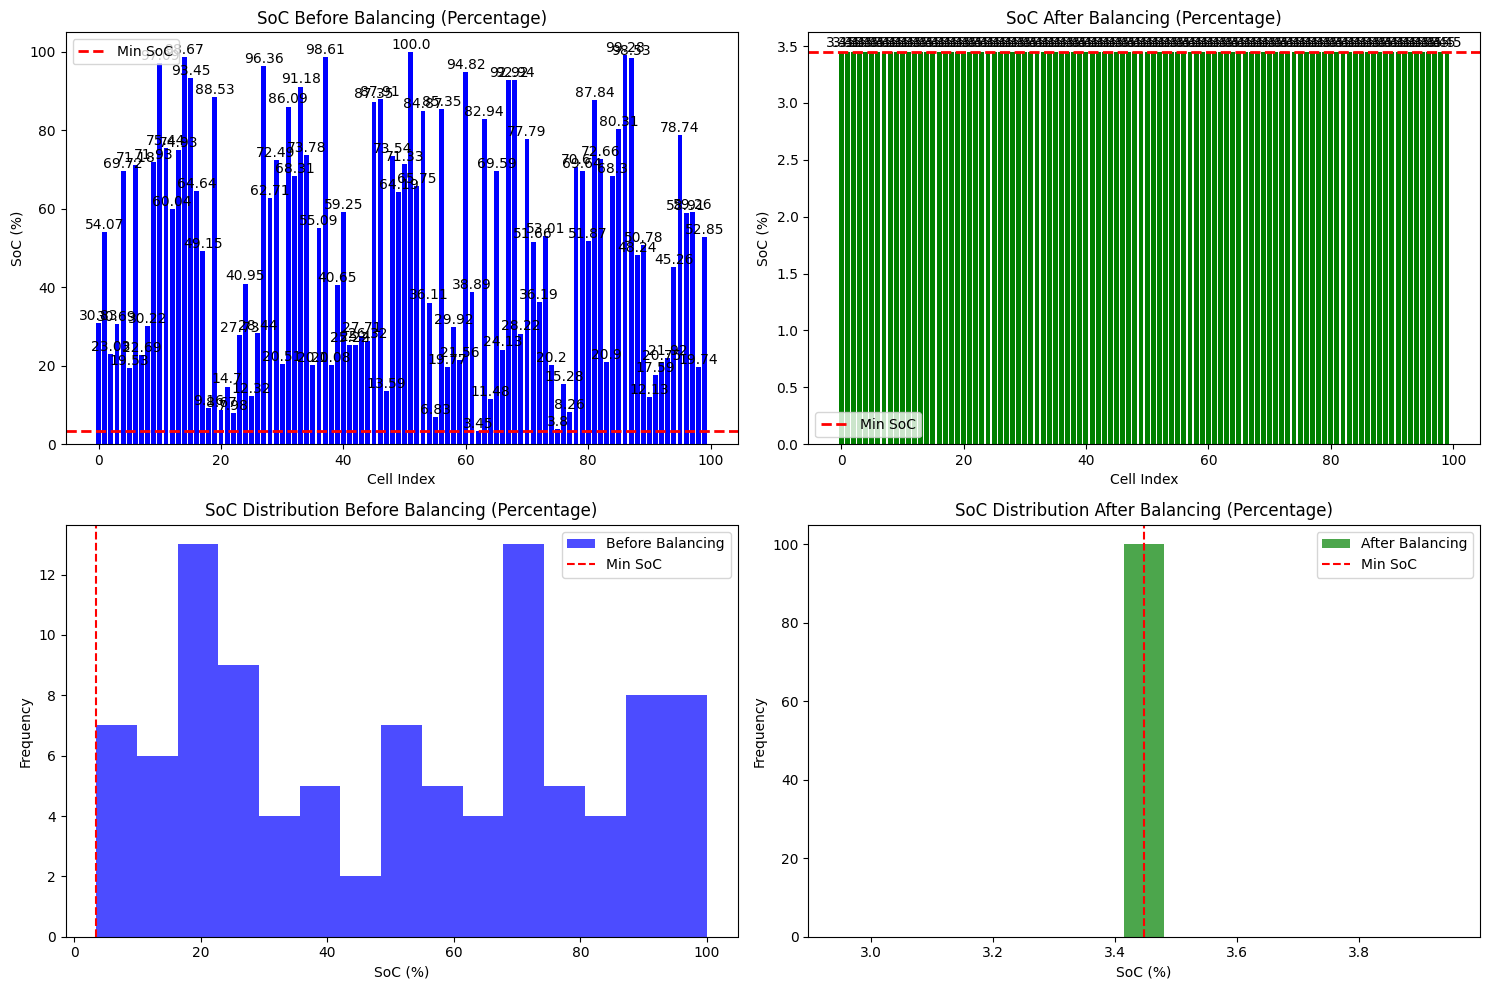

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Example Data for Multiple Battery Cells
def generate_battery_data(num_cells):
    voltage = np.random.uniform(3.5, 4.2, num_cells)  # Voltage in Volts
    current = np.random.uniform(0.1, 5.0, num_cells)  # Current in Amperes
    discharge_capacity = np.random.uniform(0.5, 2.0, num_cells)  # Discharge Capacity in Ah
    charge_energy = np.random.uniform(1.0, 10.0, num_cells)  # Charge Energy in Wh
    discharge_energy = np.random.uniform(1.0, 10.0, num_cells)  # Discharge Energy in Wh

    # Assume Charge Capacity is derived from Voltage and Current
    charge_capacity = (voltage * current) / 10  # Simple derived capacity in Ah

    return np.column_stack((voltage, current, discharge_capacity, charge_energy, discharge_energy, charge_capacity))

# Step 2: Predict State of Charge (SoC) using Linear Regression
def predict_soc(X, W, b):
    return np.dot(X, W) + b

# Step 3: Linear Regression Parameters
def linear_regression(X, y, learning_rate=0.01, iterations=1000):
    num_features = X.shape[1]
    W = np.zeros(num_features)
    b = 0

    for _ in range(iterations):
        y_pred = predict_soc(X, W, b)

        # Calculate error
        error = y_pred - y

        # Calculate gradients
        gradient_W = (1 / len(y)) * np.dot(X.T, error)
        gradient_b = (1 / len(y)) * np.sum(error)

        # Update weights and bias
        W -= learning_rate * gradient_W
        b -= learning_rate * gradient_b

    return W, b

# Step 4: Balance the State of Charge (SoC) to the Minimum SoC
def balance_soc_to_min(soc_values):
    min_soc = np.min(soc_values)
    balanced_soc = np.full_like(soc_values, min_soc)  # Set all values to minimum
    return balanced_soc

# Step 5: Convert SoC values to percentage terms
def convert_to_percentage(soc_values):
    max_soc = np.max(soc_values)
    return (soc_values / max_soc) * 100

# Step 6: Visualize SoC Before and After Balancing (in percentage terms)
def visualize_soc(before, after, min_value):
    plt.figure(figsize=(15, 10))

    # Bar chart for SoC before balancing
    plt.subplot(2, 2, 1)
    bars = plt.bar(range(len(before)), before, color='blue')
    plt.axhline(y=min_value, color='red', linestyle='--', label='Min SoC', linewidth=2)
    plt.title('SoC Before Balancing (Percentage)')
    plt.xlabel('Cell Index')
    plt.ylabel('SoC (%)')
    plt.legend()

    # Add labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

    # Bar chart for SoC after balancing
    plt.subplot(2, 2, 2)
    bars_after = plt.bar(range(len(after)), after, color='green')
    plt.axhline(y=min_value, color='red', linestyle='--', label='Min SoC', linewidth=2)
    plt.title('SoC After Balancing (Percentage)')
    plt.xlabel('Cell Index')
    plt.ylabel('SoC (%)')
    plt.legend()

    # Add labels on top of bars
    for bar in bars_after:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

    # Histogram of SoC distribution before balancing
    plt.subplot(2, 2, 3)
    plt.hist(before, bins=15, color='blue', alpha=0.7, label='Before Balancing')
    plt.axvline(x=min_value, color='red', linestyle='--', label='Min SoC')
    plt.title('SoC Distribution Before Balancing (Percentage)')
    plt.xlabel('SoC (%)')
    plt.ylabel('Frequency')
    plt.legend()

    # Histogram of SoC distribution after balancing
    plt.subplot(2, 2, 4)
    plt.hist(after, bins=15, color='green', alpha=0.7, label='After Balancing')
    plt.axvline(x=min_value, color='red', linestyle='--', label='Min SoC')
    plt.title('SoC Distribution After Balancing (Percentage)')
    plt.xlabel('SoC (%)')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main Execution
num_cells = 100  # Number of battery cells
battery_data = generate_battery_data(num_cells)  # Generate battery data
X = battery_data[:, :5]  # Features: Voltage, Current, Discharge Capacity, Charge Energy, Discharge Energy
y = battery_data[:, 5]   # Target: Charge Capacity (SoC)

# Step 7: Train the linear regression model
optimal_weights, optimal_bias = linear_regression(X, y)

# Step 8: Predict the SoC for each cell
predicted_soc = predict_soc(X, optimal_weights, optimal_bias)

# Step 9: Convert predicted SoC values to percentage
predicted_soc_percentage = convert_to_percentage(predicted_soc)

# Step 10: Balance the SoC to the minimum value among the cells (in percentage terms)
balanced_soc_percentage = balance_soc_to_min(predicted_soc_percentage)

# Calculate minimum SoC for visualization
min_soc_percentage = np.min(predicted_soc_percentage)

# Show predicted SoC values before and after balancing
print("Predicted SoC Values Before Balancing (Percentage):\n", predicted_soc_percentage)
print("\nBalanced SoC Values After Balancing (Set to Min SoC, Percentage):\n", balanced_soc_percentage)

# Visualize SoC before and after balancing
visualize_soc(predicted_soc_percentage, balanced_soc_percentage, min_soc_percentage)

